# Blur and Rotate
In this tutorial we will go over blurring and rotating. These are two image processing functions that you most likely know the function of but not how they work. We will go in depth and see how these two functions work behind the scenes.



# Blur

   Blurring is a key image processing technique used to smooth images and reduce noise. 
   It works by taking a small grid of odd pixels called the kernel. The kernel is then placed at the top left corner of the grid of pixels that make up the input image. Then, all of the pixels that fall within the kernel are added up and divided by the number of pixels, finding the average intensity value. Once this is done, only the center value of the kernel is changed to the calculated average and the kernel moves one pixel to the right. 

To produce less "chunky" blurring, functions such as the gaussian blur find the average of the values within the kernel by allowing pixels closer to the center to contribute more than the edges. 




### Functions

#### Syntax: skimage.filters.gaussian(image, sigma, output, mode, cval, preserve_range, truncate, *, channel_axis)
#### Perameters: 
image: array-like

    -Input image (grayscale or color) to filter.

sigma: scalar or sequence of scalars, optional

    -Standard deviation for Gaussian kernel. The standard deviations of the Gaussian filter are given for each axis as a sequence, or as a single number, in which case it is equal for all axes.

output: array, optional

    -The output parameter passes an array in which to store the filter output.

mode: {‘reflect’, ‘constant’, ‘nearest’, ‘mirror’, ‘wrap’}, optional

    -The mode parameter determines how the array borders are handled, where cval is the value when mode is equal to ‘constant’.      Default is ‘nearest’.

cval: scalar, optional

    -Value to fill past edges of input if mode is ‘constant’. Default is 0.0

preserve_range: bool, optional

    -If True, keep the original range of values. Otherwise, the input image is converted according to the conventions of              img_as_float (Normalized first to values [-1.0 ; 1.0] or [0 ; 1.0] depending on dtype of input)

truncate: float, optional

    -Truncate the filter at this many standard deviations.

channel_axis: int or None, optional

    -If None, the image is assumed to be a grayscale (single channel) image. Otherwise, this parameter indicates which axis of the array corresponds to channels.

In [2]:
import sys
!{sys.executable} -m pip install opencv-python


In [3]:
import os
import skimage
import skimage.io as io
import skimage.morphology as morphology
import skimage.filters as filters
import numpy as np
from skimage import transform
import rasterio

Here, you can load the image that you saved when reading and writing image files. Or, you can use the following code to display the demo.jp2.

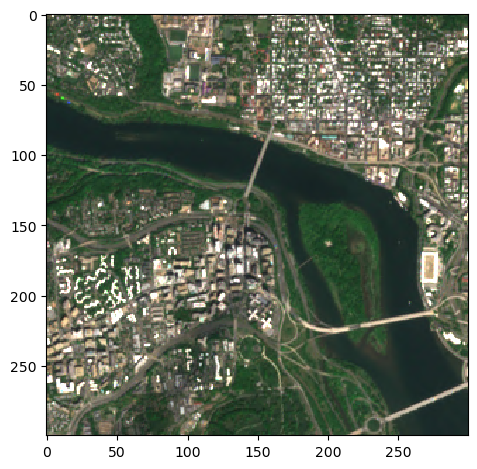

In [4]:
# Demo image
path = os.getcwd() +'\\images\\demo.jp2'
with rasterio.open(path) as src:  # jp2 image
    red = src.read(1, masked=True)
    green = src.read(2, masked=True)
    blue = src.read(3, masked=True)

image = np.stack([red, green, blue], axis=-1)  # Restacking channels
# image = io.imread('your saved .tiff image') 
io.imshow(image) 
io.show()

Now we can visualize bluring using skimage's gaussin blur function.

## Gaussian blur

C:\Users\chloe\anaconda3\envs\siaa\lib\site-packages\skimage\_shared\utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


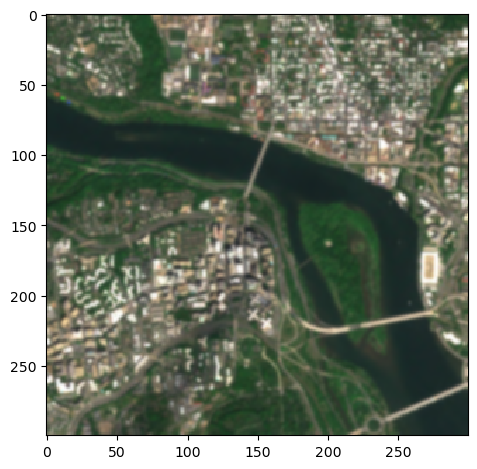

In [5]:
# Image blur with skimage gaussian
blur_image = filters.gaussian(image)
io.imshow(blur_image)
io.show()

In [6]:
filename = 'desiredname.tiff'
io.imsave(filename, blur_image)

## How it works

$$ G(x, y) = \frac{1}{{2\pi\sigma^2}} \cdot e^{-\frac{{x^2 + y^2}}{{2\sigma^2}}} $$


G(x, y) represents the Gaussian function at position (x, y) within your kernel.
σ (sigma) is the standard deviation of the Gaussian distribution. It determines how much each pixel contributes to the average. 


In the following visualization of the Gaussian distribution, you can see the degree to which proximity to the center influences the average based on the sigma value.









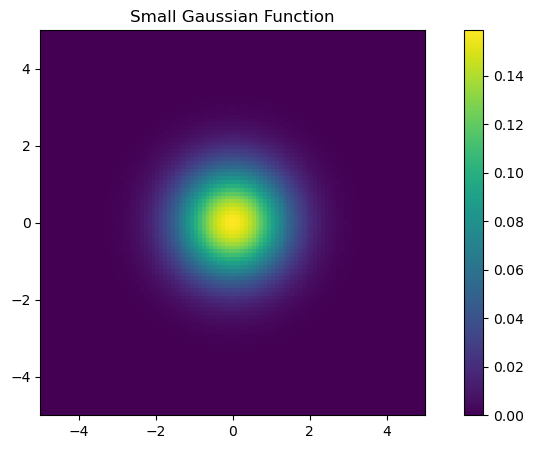

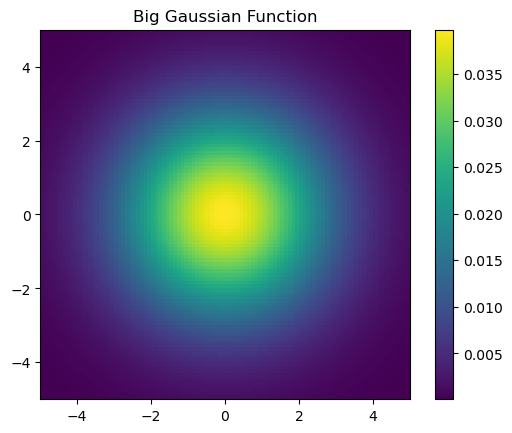

In [7]:
import matplotlib.pyplot as plt

# Create a grid of x and y values
x, y = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))

# Create a Gaussian function
ssigma = 1.0
bsigma = 2.0
sgaussian_values = np.exp(-(x**2 + y**2) / (2 * ssigma**2)) / (2 * np.pi * ssigma**2)
bgaussian_values = np.exp(-(x**2 + y**2) / (2 * bsigma**2)) / (2 * np.pi * bsigma**2)

# Plot the Gaussian function and the result of the Gaussian filter
plt.figure(figsize=(10, 5))

plt.imshow(sgaussian_values, cmap='viridis', extent=(-5, 5, -5, 5))
plt.title('Small Gaussian Function')
plt.colorbar()
plt.show()
plt.imshow(bgaussian_values, cmap='viridis', extent=(-5, 5, -5, 5))
plt.title('Big Gaussian Function')
plt.colorbar()
plt.show()

In [8]:
filename = 'desiredname.tiff'
io.imsave(filename, sgaussian_values) # Change with bgaussian_values if needed


Now that you understand what the gaussian distribution looks like, it is easier to see its influence when using it to blur an image


C:\Users\chloe\anaconda3\envs\siaa\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


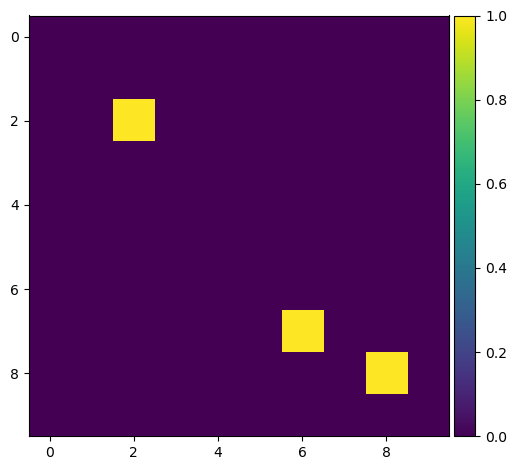

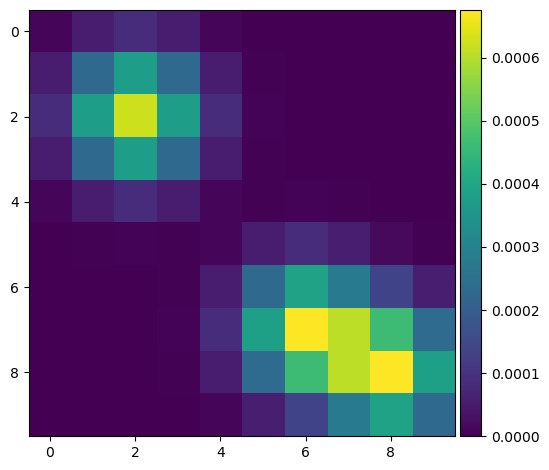

In [9]:
example = np.zeros((10, 10), dtype=np.uint8)

example[2,2] = 1
example[7,6] = 1
example[8,8] = 1

io.imshow(example)
io.show()

blur_kernel = filters.gaussian(example)

io.imshow(blur_kernel)
io.show()

# Rotate


### Functions

### Syntax: skimage.transform.rotate(image, angle, resize=False, center=None, order=None, mode='constant', cval=0, clip=True, preserve_range=False)

Rotate image by a certain angle around its center.

### Parameters

image: ndarray
    
    -Input image.

angle: float

    -Rotation angle in degrees in counter-clockwise direction.

resize: bool, optional

    -Determine whether the shape of the output image will be automatically calculated, so the complete rotated image exactly fits. Default is False.

center: iterable of length 2

    -The rotation center. If center=None, the image is rotated around its center, i.e. center=(cols / 2 - 0.5, rows / 2 - 0.5). Please note that this parameter is (cols, rows), contrary to normal skimage ordering.

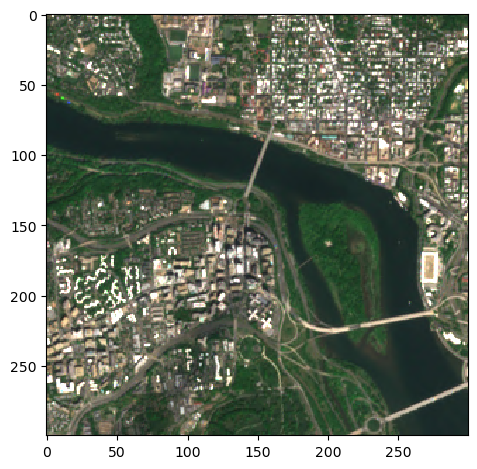

In [10]:
io.imshow(image)
io.show()

now we can use skimage rotate function to rotate the image


In [11]:
# rotate the image 
rotate = skimage.transform.rotate(image, 40.0)

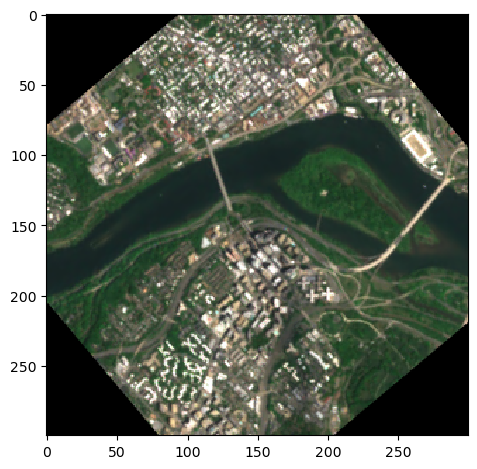

In [12]:
#Display rotated image 
io.imshow(rotate) 
io.show()

In [13]:
filename = 'desiredname.tiff'
io.imsave(filename, rotate)

## How It works


For us, it is as if we simply turned the picture around the axis. However, this is a much harder concept to convey to a computer. As a result, the function uses a series of geometric transformations and matrix operations to calculate where each individual pixel will go. The complexity of conveying this concept to a computer can be seen by the loss of accuracy when rotating a small numpy by 45 degrees twice.







In [14]:
# Example image
example = np.array([[0, 0, 1],
                    [0, 0, 1],
                    [0, 0, 1]])

# rotate the example image
fourfive = skimage.transform.rotate(example, 45.0) 
rightangle = skimage.transform.rotate(fourfive, 45.0) 

rightangle

array([[1.92883221e-10, 2.72778067e-10, 1.92883221e-10],
       [6.81945167e-11, 0.00000000e+00, 6.81945167e-11],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

# Reference list 

#### Rotate 
[1]	“OpenCV: Operations on arrays.” https://docs.opencv.org/3.4/d2/de8/group__core__array.html#gaca7be533e3dac7feb70fc60635adf441 (accessed Jun. 28, 2023).

[2]	“Python OpenCV – cv2.flip() method,” GeeksforGeeks, Jun. 23, 2020. https://www.geeksforgeeks.org/python-opencv-cv2-flip-method/ (accessed Jun. 28, 2023).

[3]	“scikit-image’s documentation — skimage 0.21.0 documentation.” https://scikit-image.org/docs/stable/ (accessed Jul. 06, 2023).



#### Blur
[1]	A. Rosebrock, “Convolutions with OpenCV and Python,” PyImageSearch, Jul. 25, 2016. https://pyimagesearch.com/2016/07/25/convolutions-with-opencv-and-python/ (accessed Jun. 28, 2023).

[2]	S. Van Der Walt et al., “scikit-image: image processing in Python,” PeerJ, vol. 2, p. e453, Jun. 2014, doi: 10.7717/peerj.453.

[3]	A. Rosebrock, “OpenCV Smoothing and Blurring,” PyImageSearch, Apr. 28, 2021. https://pyimagesearch.com/2021/04/28/opencv-smoothing-and-blurring/ (accessed Jun. 28, 2023).

[4]	“Python OpenCV | cv2.blur() method,” GeeksforGeeks, Nov. 22, 2019. https://www.geeksforgeeks.org/python-opencv-cv2-blur-method/ (accessed Jun. 28, 2023).

[5]	“Gaussian Blur.” https://www.w3.org/Talks/2012/0125-HTML-Tehran/Gaussian.xhtml (accessed Jun. 28, 2023).


